<big>Task3

This experiment's aim is to implement a XOR network and calculate gradient descent using backpropagation to update parameters.

First, import packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Next, implement all activation functions and derivative functions.

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def reLu(x):
    return np.maximum(0, x)

def rel_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

Then implement a function that calculates the Mean Squared Error (MSE).

In [3]:
def error_function(X, output, targets):
    # Define the 4 possible inputs and corresponding target outputs
    total_error = np.sum((output - targets) ** 2)
    mse = total_error / len(X)
    return mse

Implement the XOR network and backpropagation function to update parameters.

In [4]:
bias = np.array([1])
def xor_net(X, W, activation):    
    X_input = np.insert(X, 0, bias, axis=1)
    output1 = X_input @ W
    layer_out = activation(output1)
    return output1, layer_out

In [5]:
def backward_propagation(X, targets, output1, output2, W1, W2, alpha, derivative):
    m1 = X.shape[0]
    m2 = output1.shape[0]
    # 4*1
    dZ2 = (output2.reshape(-1, 1) - targets) * derivative(output2.reshape(-1, 1))
    output1_copy = np.copy(output1)
    output1_copy1 = np.insert(output1_copy, 0, bias, axis=1)# 4*3
    dW2 = (1 / m1) * (output1_copy1.T @ dZ2) # 3*1
    dA1 = dZ2 @ (W2[:2].reshape(2, 1).T)# 4*1 1*2 = 4*2
    
    dZ1 = dA1 * derivative(output1)# 4*2
    X_copy = np.copy(X)
    X_copy1 = np.insert(X_copy, 0, bias, axis=1)# 4*3
    dW1 = (1. / m2) * (X_copy1.T @ dZ1) # 3*2
    W2 -= alpha * dW2
    W1 -= alpha * dW1
    return W1, W2

Finally, we can test it to see the results of different activation functions using one random weight value.

In [6]:
def test(X, targets, activation, derivative):
    iteration = 1000
    losses = []
    miss = []
    np.random.seed(1)
    W = np.random.rand(1, 9).reshape(3, 3)

    # 4*3
    W1 = W[:, :2]
    W2 = W[:, 2].reshape(-1, 1)
    for i in range(iteration):
        x1, output1 = xor_net(X, W1, activation)
        x2, output2 = xor_net(output1, W2, activation)
        x1.astype(np.longdouble)
        x2.astype(np.longdouble)
        output2_ = np.copy(output2)
        output2_ = np.where(output2_ > 0.5, 1, 0)
        mse = error_function(X, output2, targets)
        miss_classify = np.sum(output2_ != targets)
        learning_rate = 0.05

        W1, W2 = backward_propagation(X, targets, output1, output2, W1, W2, learning_rate, derivative)
        if i % 10 == 0:
            losses.append(mse)
            miss.append(miss_classify)
    fig, ax = plt.subplots(1,2)
    ax[0].set_title("loss")
    ax[0].plot(losses, color='b',)
    ax[1].set_title("misclassified number")
    ax[1].scatter(range(len(miss)), miss, color='b')
    plt.show()  

Now see the results with different activation functions

In [7]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.longdouble)
targets = np.array([0, 1, 1, 0], dtype=np.longdouble).reshape(-1, 1)

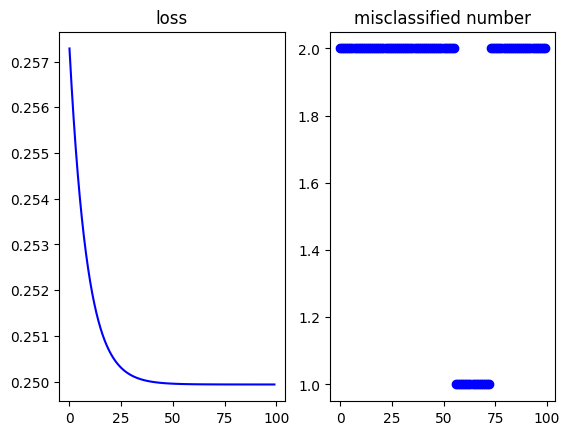

In [8]:
test(X, targets, sigmoid, sigmoid_derivative)

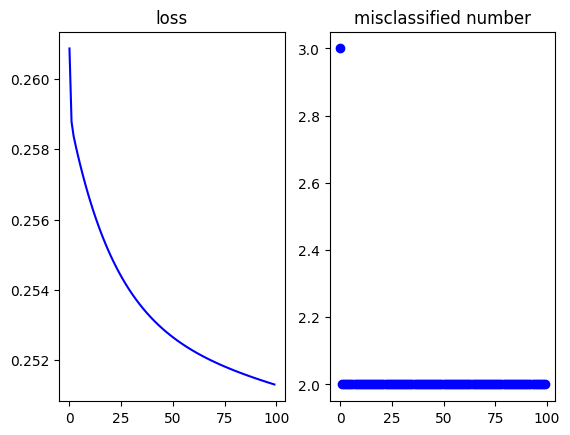

In [9]:
test(X, targets, reLu, rel_derivative)

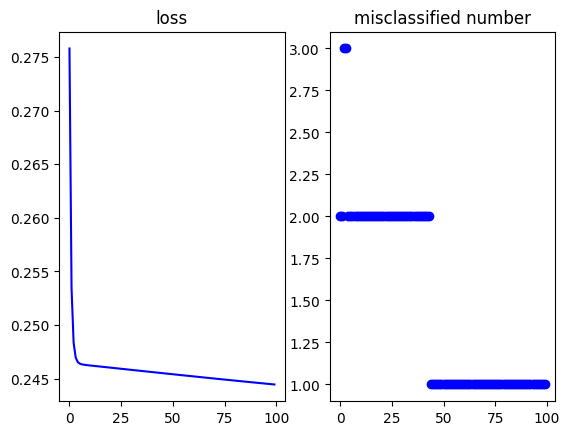

In [10]:
test(X, targets, tanh, tanh_derivative)

In order to find weights, keep generating random weights and testing if it's result is right.

In [11]:
def random_xor_weights(X, targets, activation, derivative):
    max_iterations = 100000
    
    for i in range(max_iterations):
        W = np.random.randn(1, 9)
        W = W.reshape(3, 3)
        W1 = W[:, :2]
        W2 = W[:, 2].reshape(-1, 1)
        for _ in range(100):
            x1, output1 = xor_net(X, W1, activation)
            x2, output2 = xor_net(output1, W2, activation)
            x1.astype(np.longdouble)
            x2.astype(np.longdouble)
            output2_ = np.copy(output2)
            output2_ = np.where(output2_ > 0.5, 1, 0)
            alpha = 0.5

            W1, W2 = backward_propagation(X, targets, output1, output2, W1, W2, alpha, derivative)
        if np.sum(output2_ == targets) == 4:
            print(f"Found solution on iteration {i + 1}")
            print("W1:", W1)
            print("W2:", W2)
            break
    else:
        print("No solution found after maximum iterations.")


In [12]:
random_xor_weights(X, targets, sigmoid, sigmoid_derivative)

Found solution on iteration 1745
W1: [[-1.64277708  1.88025548]
 [-1.14376723 -1.02383229]
 [ 1.6131951   1.52224423]]
W2: [[ 0.94666422]
 [ 0.68146068]
 [-1.30243559]]


In [13]:
random_xor_weights(X, targets, reLu, rel_derivative)

Found solution on iteration 188
W1: [[ 1.02359263e-05  9.26840276e-03]
 [-8.94781635e-01  1.20197905e+00]
 [ 8.97120421e-01 -1.84413012e+00]]
W2: [[-0.00205595]
 [ 1.11303666]
 [ 0.82551229]]


In [14]:
random_xor_weights(X, targets, tanh, tanh_derivative)

Found solution on iteration 6
W1: [[ 0.04627543 -1.32818553]
 [-1.25794241  0.87957951]
 [-2.42985285  1.04898824]]
W2: [[-1.00295734]
 [-1.866312  ]
 [-1.34299157]]


Another method is to find the number of iteration when finding the good weight values randomly without using gradient descent

In [15]:
def random_xor_weights2(X, targets, activation):
    max_iterations = 100000
    
    for i in range(max_iterations):
        W = np.random.randn(1, 9)
        W = W.reshape(3, 3)
        W1 = W[:, :2]
        W2 = W[:, 2].reshape(-1, 1)
        
        x1, output1 = xor_net(X, W1, activation)
        x2, output2 = xor_net(output1, W2, activation)
        output2_ = np.copy(output2)
        output2_ = np.where(output2_ > 0.5, 1, 0)
        
        if np.sum(output2_ == targets) == 4:
            print(f"Found solution on iteration {i + 1}")
            print("W1:", W1)
            print("W2:", W2)
            break
    else:
        print("No solution found after maximum iterations.")

In [16]:
random_xor_weights2(X, targets, sigmoid)

No solution found after maximum iterations.


In [17]:
random_xor_weights2(X, targets, reLu)

Found solution on iteration 6041
W1: [[ 2.0091815  -0.48778333]
 [-1.94618058  1.19932928]
 [-1.62928482  0.5727655 ]]
W2: [[ 1.41355116]
 [-0.69719203]
 [-0.83772491]]


In [18]:
random_xor_weights2(X, targets, tanh)

Found solution on iteration 11566
W1: [[-0.27270608  0.57464347]
 [ 0.86930664  2.51700244]
 [-0.70715784 -0.91218694]]
W2: [[ 0.92279427]
 [ 0.60105972]
 [-0.60248327]]


Then, see the performance using the same weight initisializaiton and different learning rates to see performance after all iterations.

In [19]:
def test_w(X, targets, activation, derivative):
    iteration = 100
    losses = []
    miss = []
    # 4*3
    np.random.seed(1)
    W = np.random.rand(1, 9).reshape(3, 3)
    W1 = W[:, :2]
    W2 = W[:, 2].reshape(-1, 1)
    learning_rates = np.arange(0.5, 0.52, 0.0001)
    for learning_rate in learning_rates:
        for i in range(iteration):
            x1, output1 = xor_net(X, W1, activation)
            x2, output2 = xor_net(output1, W2, activation)
            x1.astype(np.longdouble)
            x2.astype(np.longdouble)
            output2_ = np.copy(output2)
            output2_ = np.where(output2_ > 0.5, 1, 0)
            mse = error_function(X, output2, targets)
            miss_classify = np.sum(output2_ != targets)

            W1, W2 = backward_propagation(X, targets, output1, output2, W1, W2, learning_rate, derivative)
        
        losses.append(mse)
        miss.append(miss_classify)

    fig, ax = plt.subplots(1,2)
    ax[0].set_title("loss")
    ax[0].set_xlabel("learning_rate")
    ax[0].plot(learning_rates, losses, color='b',)
    ax[1].set_title("misclassified number")
    ax[1].set_xlabel("learning_rate")
    ax[1].plot(learning_rates, miss, color='b',)
    plt.show()  

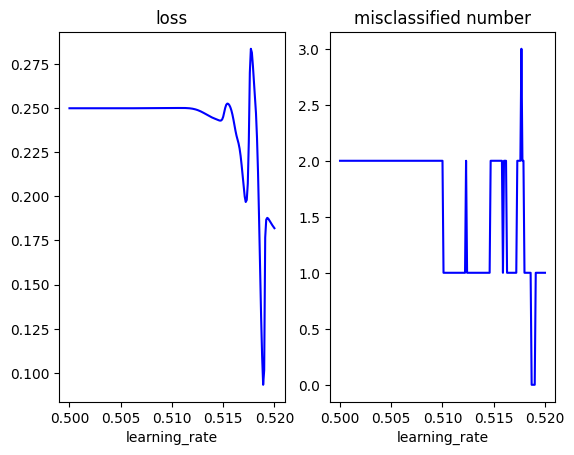

In [20]:
test_w(X, targets, sigmoid, sigmoid_derivative)

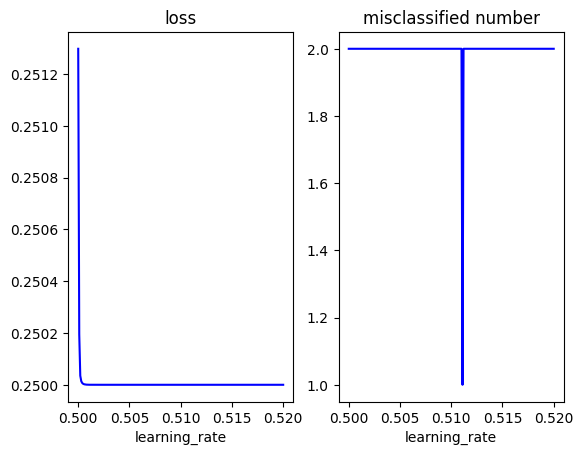

In [21]:
test_w(X, targets, reLu, rel_derivative)

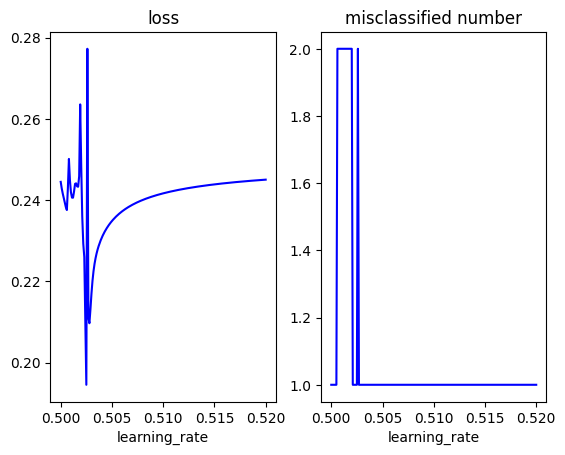

In [22]:
test_w(X, targets, tanh, tanh_derivative)